In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#Plots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
import squarify

print('Loading...')
print('100%...necessary libraries imported')

Loading...
100%...necessary libraries imported


In [3]:
data = pd.read_excel('improvised_data.xlsx')
data

,Unnamed: 0,Gender,Age,Income,Region,PartyID,Ideology,Vote Intention,Attention to election
0,NaN,Male,45-65,Under $50K,West,Democratic,Liberal,Trump,A lot
1,NaN,Male,65+,$50-100K,West,Independent,Modern Liberal,Trump,A lot
2,NaN,Male,30-44,Under $50K,Midwest,Democratic,Conservative,Trump,A lot
3,NaN,Male,30-44,Under $50K,Northeast,Democratic,Liberal,Biden,A lot
4,NaN,Male,45-65,Under $50K,Midwest,Republican,Conservative,Trump,A lot
...,...,...,...,...,...,...,...,...,...
1495,NaN,Female,65+,$50-100K,Northeast,Republican,Modern Liberal,Trump,Not at all
1496,NaN,Female,45-65,$50-100K,South,Independent,Liberal,Biden,Not at all
1497,NaN,Female,30-44,Under $50K,South,Democratic,Conservative,Trump,Not at all
1498,NaN,Female,30-44,Under $50K,West,Democratic,Conservative,Biden,Not at all


# EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
Unnamed: 0               0 non-null float64
Gender                   1500 non-null object
Age                      1500 non-null object
Income                   1500 non-null object
Region                   1500 non-null object
PartyID                  1500 non-null object
Ideology                 1500 non-null object
Vote Intention           1500 non-null object
Attention to election    1500 non-null object
dtypes: float64(1), object(8)
memory usage: 105.6+ KB


In [5]:
data.columns

Index(['Unnamed: 0', 'Gender', 'Age', 'Income', 'Region', 'PartyID',
       'Ideology', 'Vote Intention', 'Attention to election'],
      dtype='object')

In [6]:
#dropping unnamed column
data = data.drop('Unnamed: 0', axis =1)

### Looking closely at columns

In [7]:
data.Gender.value_counts()

Female    817
Male      683
Name: Gender, dtype: int64

In [8]:
data.Age.value_counts()

45-65    622
65+      400
30-44    303
18-29    175
Name: Age, dtype: int64

In [9]:
data.Income.value_counts()

Under $50K       631
$50-100K         532
$100K or more    337
Name: Income, dtype: int64

In [10]:
data.Region.value_counts()

South        576
West         383
Midwest      279
Northeast    262
Name: Region, dtype: int64

In [11]:
data.PartyID.value_counts()

Democratic     546
Independent    537
Republican     417
Name: PartyID, dtype: int64

In [12]:
data.Ideology.value_counts()

Conservative      549
Liberal           482
Modern Liberal    469
Name: Ideology, dtype: int64

In [13]:
data['Attention to election'].value_counts() 

A lot            1018
Some              312
Only a little     152
Not at all         18
Name: Attention to election, dtype: int64

In [14]:
#Changing name of y to Target
data.columns = ['Gender', 'Age', 'Income', 'Region', 'PartyID', 'Ideology', 'Target', 'Attention to election']

In [15]:
data

,Gender,Age,Income,Region,PartyID,Ideology,Target,Attention to election
0,Male,45-65,Under $50K,West,Democratic,Liberal,Trump,A lot
1,Male,65+,$50-100K,West,Independent,Modern Liberal,Trump,A lot
2,Male,30-44,Under $50K,Midwest,Democratic,Conservative,Trump,A lot
3,Male,30-44,Under $50K,Northeast,Democratic,Liberal,Biden,A lot
4,Male,45-65,Under $50K,Midwest,Republican,Conservative,Trump,A lot
...,...,...,...,...,...,...,...,...
1495,Female,65+,$50-100K,Northeast,Republican,Modern Liberal,Trump,Not at all
1496,Female,45-65,$50-100K,South,Independent,Liberal,Biden,Not at all
1497,Female,30-44,Under $50K,South,Democratic,Conservative,Trump,Not at all
1498,Female,30-44,Under $50K,West,Democratic,Conservative,Biden,Not at all


In [16]:
gender to age
age to income
income to region
region to partyid
partyid to ideology
age to attention-to-election

SyntaxError: invalid syntax (<ipython-input-16-aab9411681ea>, line 1)

## Citizens who paid attention to election

In [17]:
data.groupby(['Age', 'Gender']).count()['Attention to election']

Age    Gender
18-29  Female    103
       Male       72
30-44  Female    168
       Male      135
45-65  Female    327
       Male      295
65+    Female    219
       Male      181
Name: Attention to election, dtype: int64

Text(0.5, 1.0, 'Attention to election')

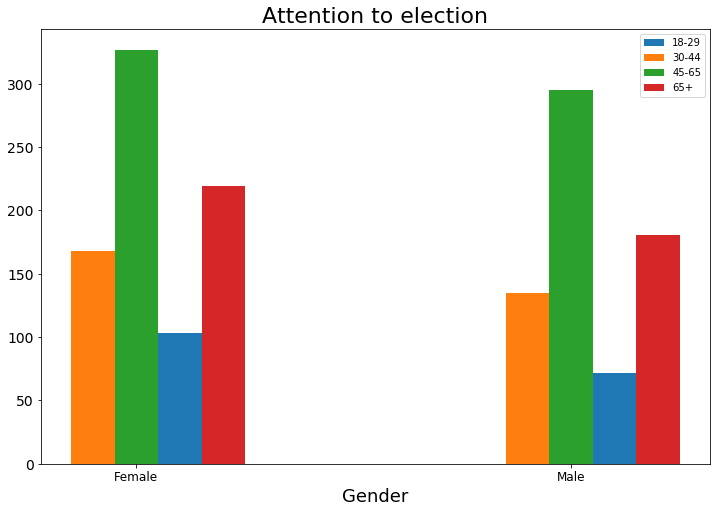

In [18]:
plt.figure(figsize=(12,8))
x_gender = ['Female', 'Male']
x_indexes = np.arange(len(x_gender))
width = 0.1 

y_18 = [103, 72]
plt.bar(x_indexes + 0.1, y_18, width = width ,label = '18-29')

y_30 = [168, 135]
plt.bar(x_indexes - 0.1, y_30, width = width, label = '30-44')

y_45 = [327, 295]
plt.bar(x_indexes, y_45, width = width, label = '45-65')

y_65plus = [219, 181]
plt.bar(x_indexes + 0.2, y_65plus, width = width, label = '65+')

plt.legend()

plt.xlabel('Gender', fontsize=18)
plt.xticks(ticks = x_indexes, labels = x_gender, fontsize = 12)
plt.yticks(fontsize = 14)
plt.title('Attention to election', fontsize=22)

## PartyID count by Gender

In [19]:
data.groupby(['PartyID', 'Gender']).count()['Ideology']

PartyID      Gender
Democratic   Female    304
             Male      242
Independent  Female    297
             Male      240
Republican   Female    216
             Male      201
Name: Ideology, dtype: int64

Text(0.5, 1.0, 'PartyID count by Gender')

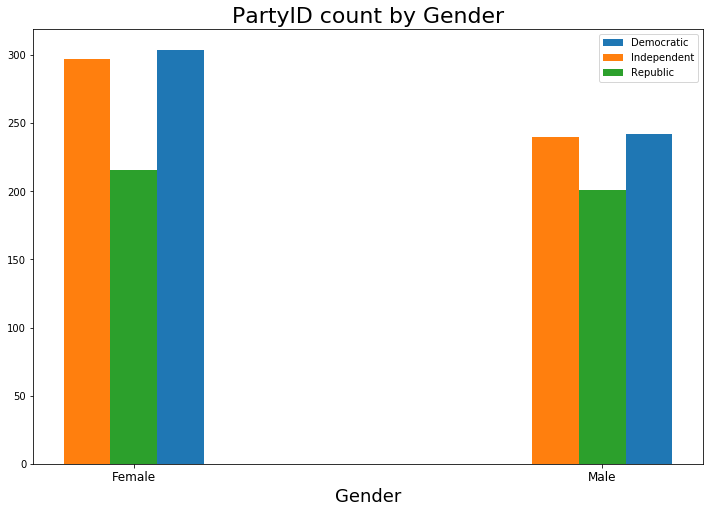

In [20]:
plt.figure(figsize=(12,8))
x_gender = ['Female', 'Male']
x_indexes = np.arange(len(x_gender))
width = 0.1 

y_demo = [304, 242]
plt.bar(x_indexes + 0.1, y_demo, width = width ,label = 'Democratic')

y_ind = [297, 240]
plt.bar(x_indexes - 0.1, y_ind, width = width, label = 'Independent')

y_rep = [216, 201]
plt.bar(x_indexes, y_rep, width = width, label = 'Republic')


plt.legend()

plt.xlabel('Gender', fontsize=18)
plt.xticks(ticks = x_indexes, labels = x_gender, fontsize = 12)
plt.title('PartyID count by Gender', fontsize=22)

## Vote intention count by Region

In [21]:
data.groupby(['Income', 'Region']).count()['Target']

Income         Region   
$100K or more  Midwest       72
               Northeast     54
               South        118
               West          93
$50-100K       Midwest      106
               Northeast     99
               South        203
               West         124
Under $50K     Midwest      101
               Northeast    109
               South        255
               West         166
Name: Target, dtype: int64

Text(0.5, 1.0, 'Vote intention count by Region')

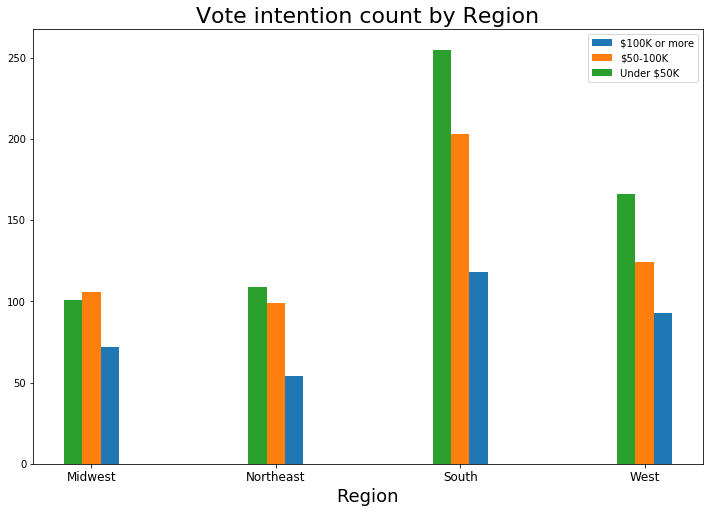

In [26]:
plt.figure(figsize=(12,8))
x_region = ['Midwest', 'Northeast', 'South', 'West']
x_indexes = np.arange(len(x_region))
width = 0.1 

y_morethan100 = [72, 54, 118, 93]
plt.bar(x_indexes + 0.1, y_morethan100, width = width ,label = '$100K or more')

y_50_100 = [106, 99, 203, 124]
plt.bar(x_indexes, y_50_100, width = width, label = '$50-100K')

y_less50 = [101, 109, 255, 166] 
plt.bar(x_indexes - 0.1, y_less50, width = width, label = 'Under $50K')

plt.legend()

plt.xlabel('Region', fontsize=18)
plt.xticks(ticks = x_indexes, labels = x_region, fontsize = 12)
plt.title('Vote intention count by Region', fontsize=22)